### Air Quality Index Data Analysis

#### import necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

#### To Read the csv file

In [7]:
df = pd.read_csv(r"data_date.csv")

In [9]:
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [11]:
df.describe()

,AQI Value
count,16653.000000
mean,62.211013
std,49.026198
min,1.000000
25%,29.000000
50%,53.000000
75%,82.000000
max,963.000000


In [13]:
df.dtypes

Date         object
Country      object
Status       object
AQI Value     int64
dtype: object

In [15]:
df.isnull().sum()


Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [17]:
#Total number of unique countries.
df['Country'].nunique()

142

In [19]:
df['AQI Value'].min()

1

In [21]:
df['AQI Value'].max()

963

In [23]:
df['AQI Value'].mean()

62.21101303068516

#### # To Calculate the distribution of AQI Status

In [25]:
# Calculate the distribution of AQI Status
aqi_status_distribution = df['Status'].value_counts()

# Display the result
print("Distribution of AQI Status:")
print(aqi_status_distribution)


Distribution of AQI Status:
Status
Good                              8025
Moderate                          6072
Unhealthy for Sensitive Groups    1662
Unhealthy                          702
Very Unhealthy                     118
Hazardous                           74
Name: count, dtype: int64


#### Distribution graph of AQI Status Across Countries

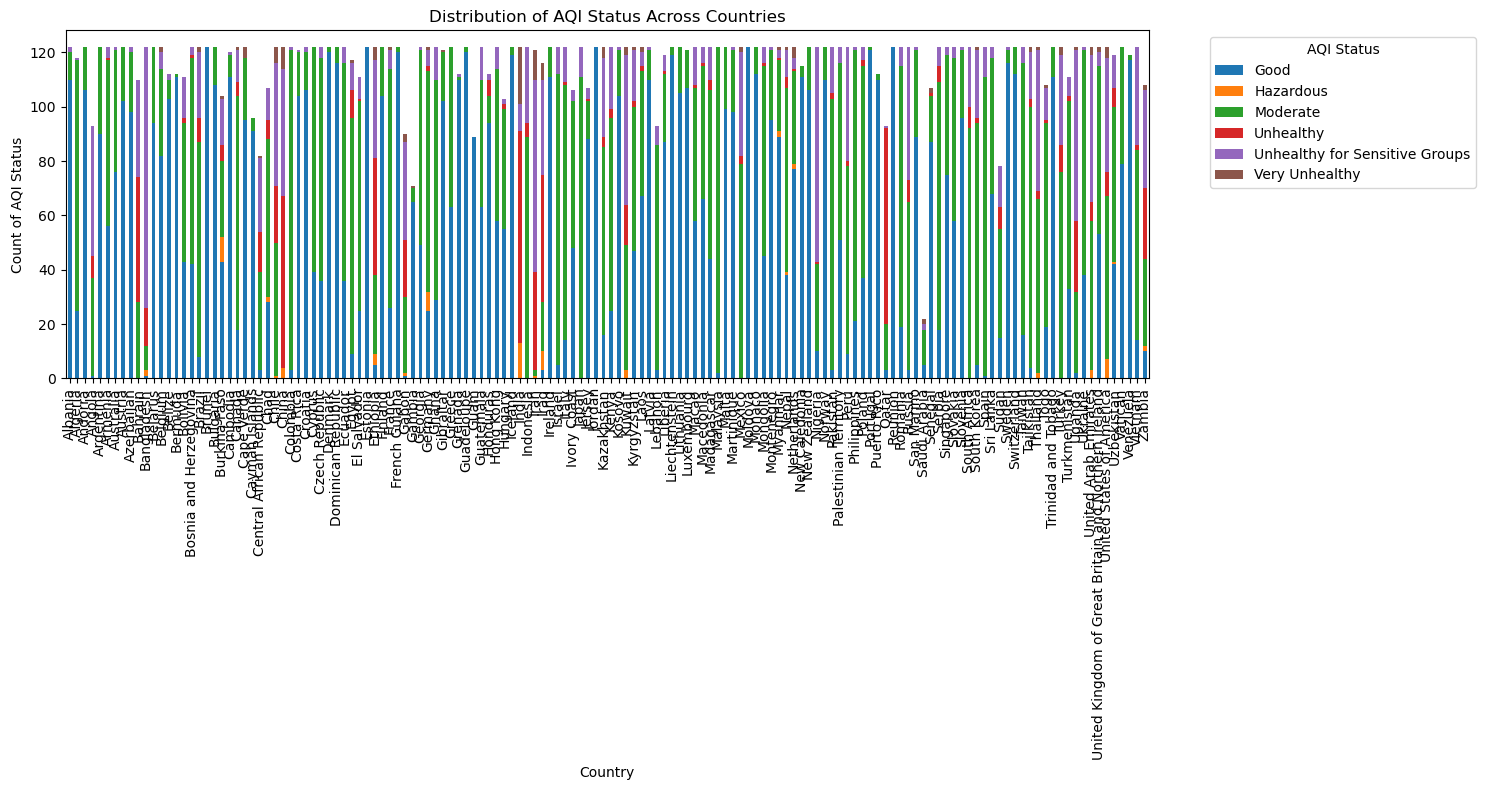

In [27]:
import matplotlib.pyplot as plt

# Group data by Country and Status and count the occurrences
country_aqi_status = df.groupby(['Country', 'Status']).size().unstack(fill_value=0)

# Plot the bar chart
country_aqi_status.plot(kind='bar', stacked=True, figsize=(15, 8))

# Add labels and title
plt.title('Distribution of AQI Status Across Countries')
plt.xlabel('Country')
plt.ylabel('Count of AQI Status')
plt.legend(title='AQI Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


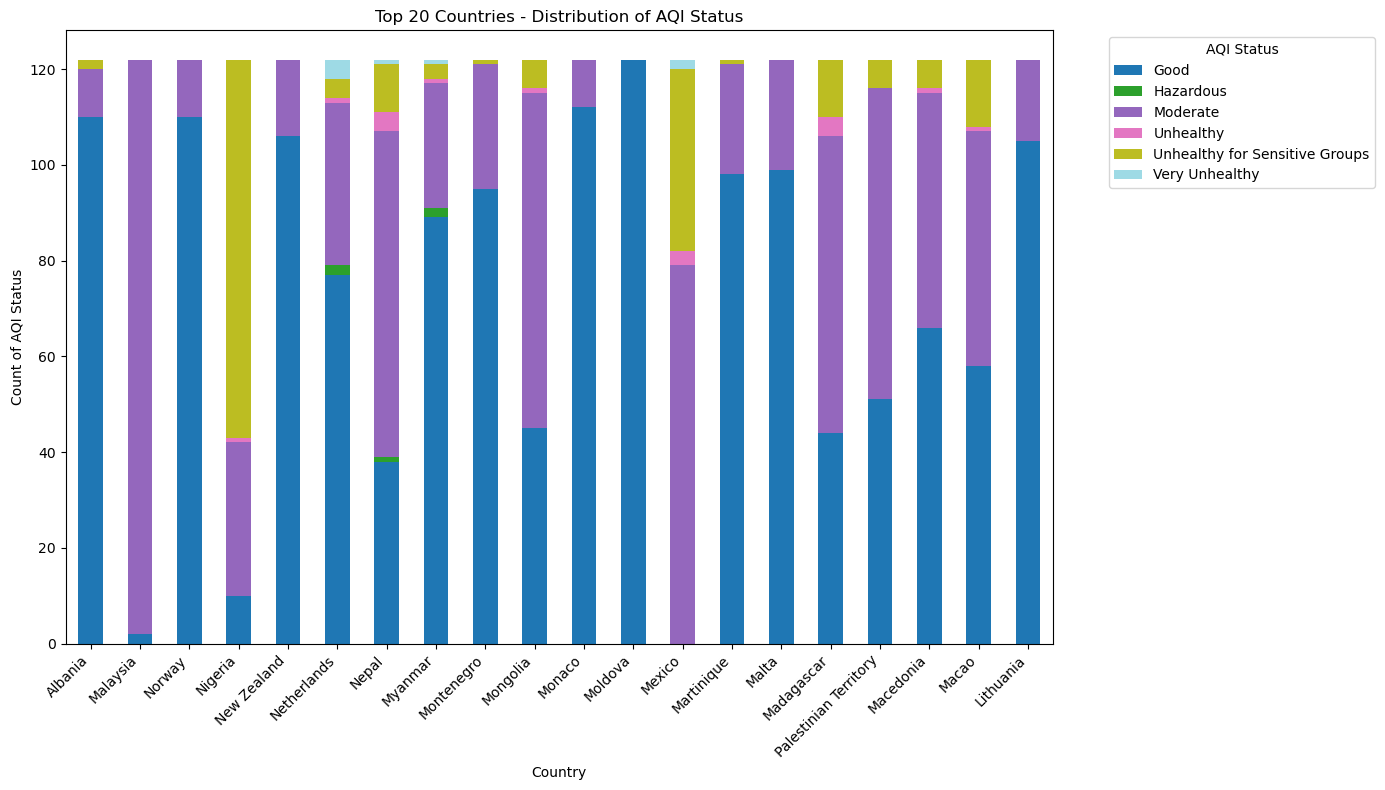

In [52]:
# Group data by Country and Status and count occurrences
country_aqi_status = df.groupby(['Country', 'Status']).size().unstack(fill_value=0)

# Sort countries by total AQI counts
top_countries = country_aqi_status.sum(axis=1).sort_values(ascending=False).head(20)

# Filter the top 20 countries
filtered_aqi_status = country_aqi_status.loc[top_countries.index]

# Plot the bar chart
filtered_aqi_status.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title('Top 20 Countries - Distribution of AQI Status')
plt.xlabel('Country')
plt.ylabel('Count of AQI Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='AQI Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


#### Displaying AQI trends over time

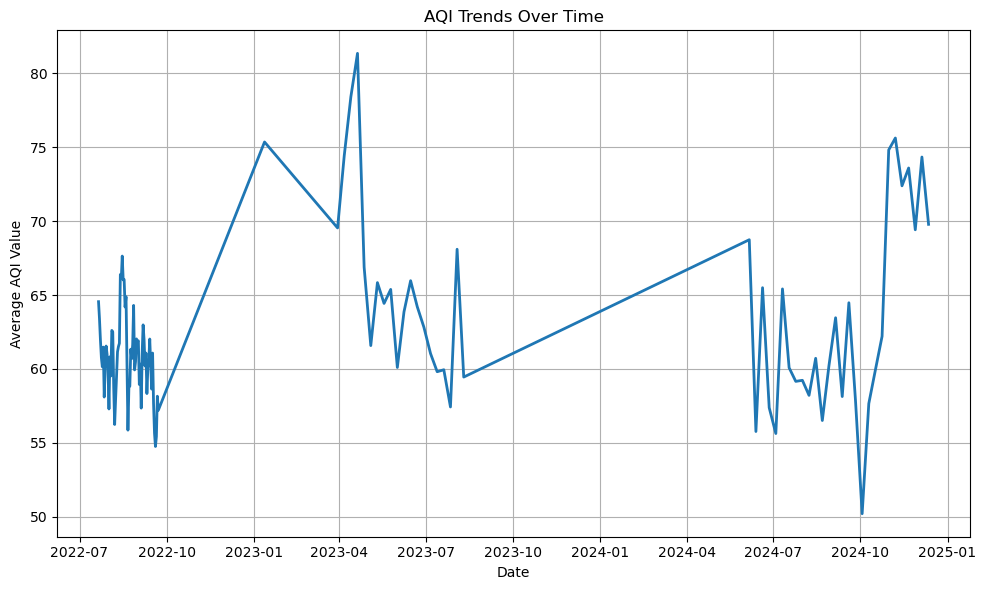

In [29]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group AQI values by Date and calculate the mean
aqi_trend = df.groupby('Date')['AQI Value'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(aqi_trend.index, aqi_trend.values, color='tab:blue', linewidth=2)

# Add labels and title
plt.title('AQI Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


#### Heatmap of AQI Values by Country and Date

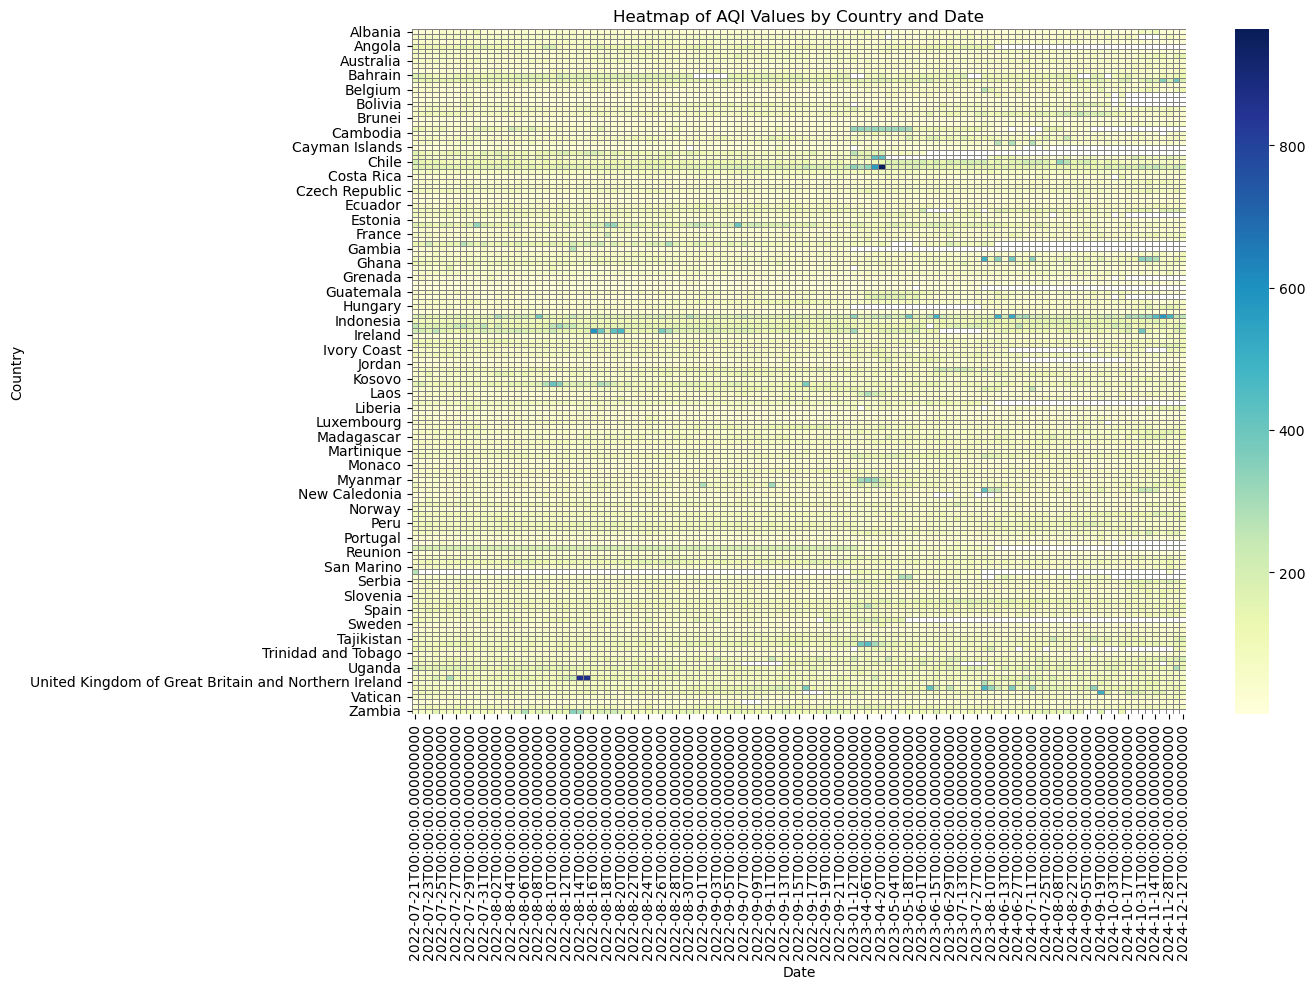

In [30]:
import seaborn as sns

# Pivot the data for the heatmap (average AQI per country and date)
heatmap_data = df.pivot_table(values='AQI Value', index='Country', columns='Date', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

# Add title
plt.title('Heatmap of AQI Values by Country and Date')
plt.xlabel('Date')
plt.ylabel('Country')
plt.tight_layout()

# Show the plot
plt.show()


#### AQI Status Categories

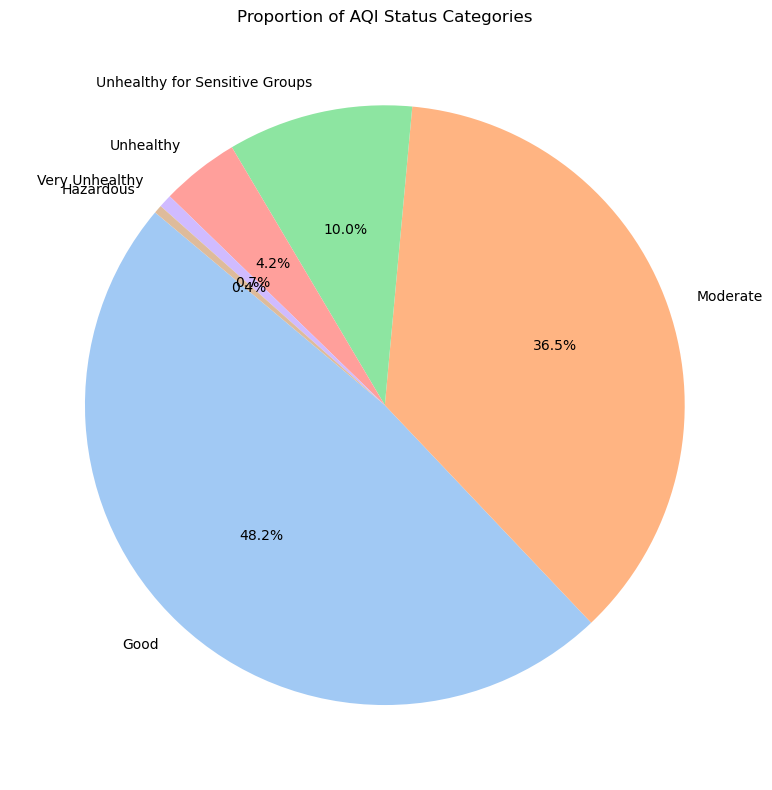

In [31]:
# Calculate the distribution of AQI Status
aqi_status_counts = df['Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(aqi_status_counts, labels=aqi_status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'))

# Add title
plt.title('Proportion of AQI Status Categories')
plt.tight_layout()

# Show the plot
plt.show()


#### Applying Linear Regression Model

In [34]:

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
country_LE = LabelEncoder()
status_LE = LabelEncoder()
df['country_encoded'] = country_LE.fit_transform(df['Country'])
df['status_encoded'] = status_LE.fit_transform(df['Status'])
# select features and target variable
X = df[['Year','Month','Day','country_encoded','status_encoded']]
y = df['AQI Value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# model performance
y_pred = linear_model.predict(X_test)
# Assuming y_test and y_pred are already defined
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# model evaluation
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")
# Display coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {linear_model.intercept_:.4f}")

Linear Regression Model Performance:
Mean Absolute Error (MAE): 16.59425878807619
Mean Squared Error (MSE): 1066.038869696126
R-Squared (R2): 0.5646508136271089

Model Coefficients:
Year: 0.7135
Month: -0.5351
Day: -0.0244
country_encoded: 0.0055
status_encoded: 26.5770

Intercept: -1411.0973


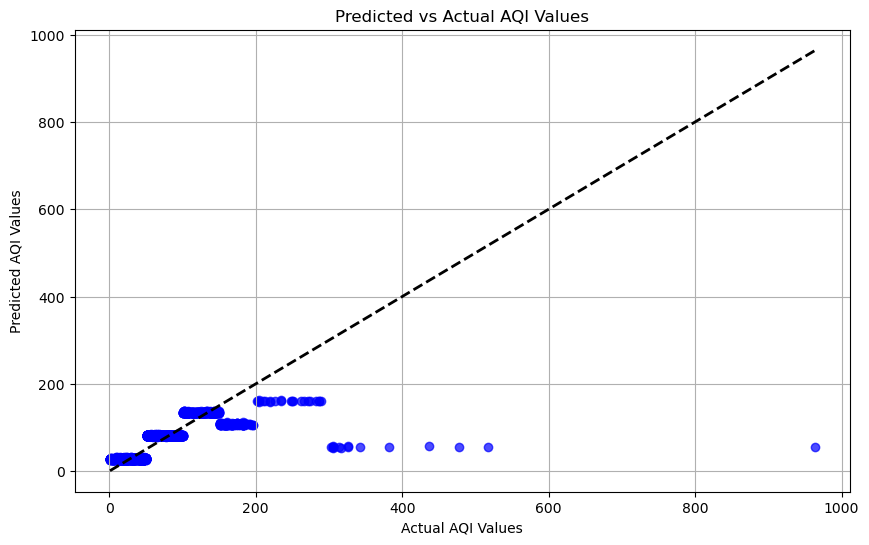

In [36]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual AQI Values")
plt.ylabel("Predicted AQI Values")
plt.title("Predicted vs Actual AQI Values")
plt.grid()
plt.show()



#### Ridge, Lasso and Random forest regression models

In [38]:

# Initialize models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
ridge_preds = ridge_model.predict(X_test)
lasso_preds = lasso_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R-Squared (R2): {r2_score(y_true, y_pred):.2f}")
    print("-" * 50)

evaluate_model(y_test, ridge_preds, "Ridge Regression")
evaluate_model(y_test, lasso_preds, "Lasso Regression")
evaluate_model(y_test, rf_preds, "Random Forest Regression")


Model: Ridge Regression
Mean Absolute Error (MAE): 16.59
Mean Squared Error (MSE): 1066.04
R-Squared (R2): 0.56
--------------------------------------------------
Model: Lasso Regression
Mean Absolute Error (MAE): 16.58
Mean Squared Error (MSE): 1066.30
R-Squared (R2): 0.56
--------------------------------------------------
Model: Random Forest Regression
Mean Absolute Error (MAE): 8.44
Mean Squared Error (MSE): 237.97
R-Squared (R2): 0.90
--------------------------------------------------


#### Visualization for the above models

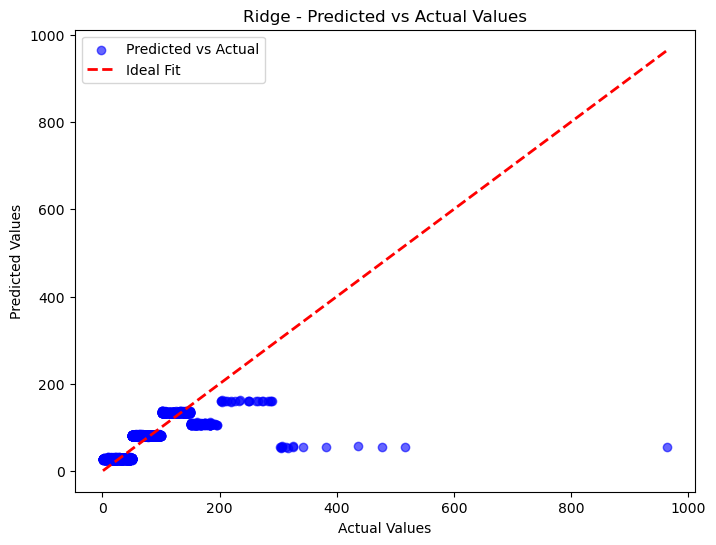

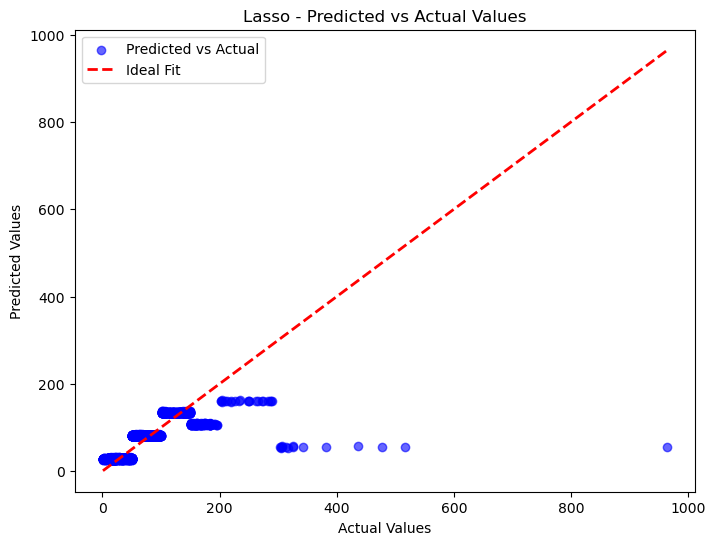

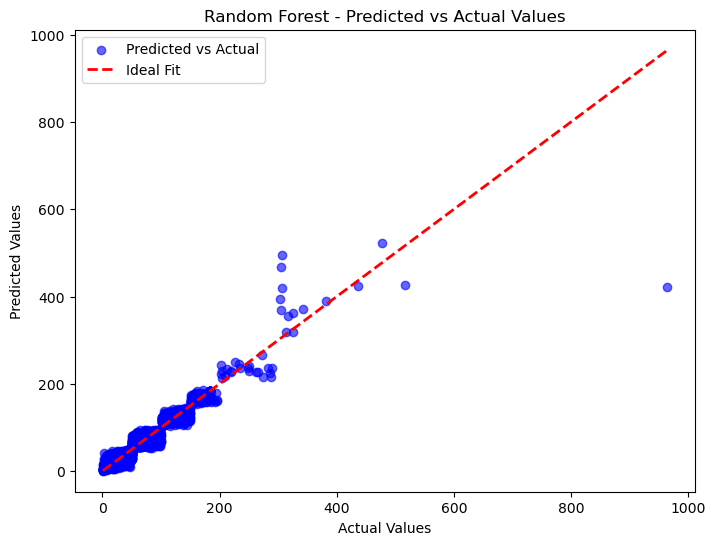

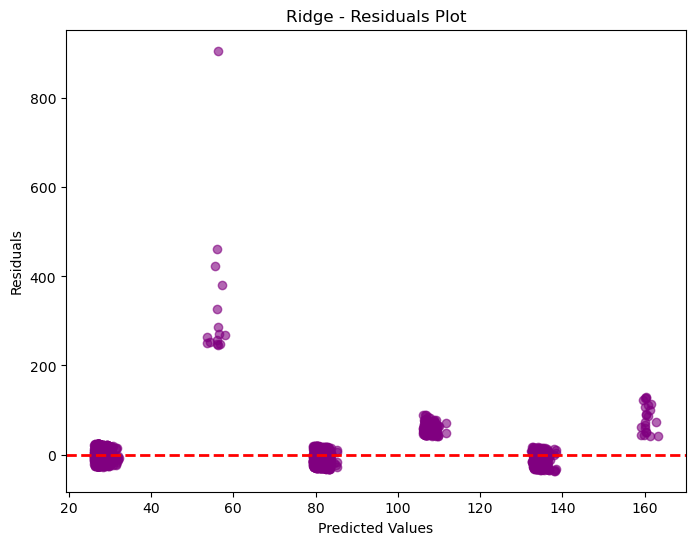

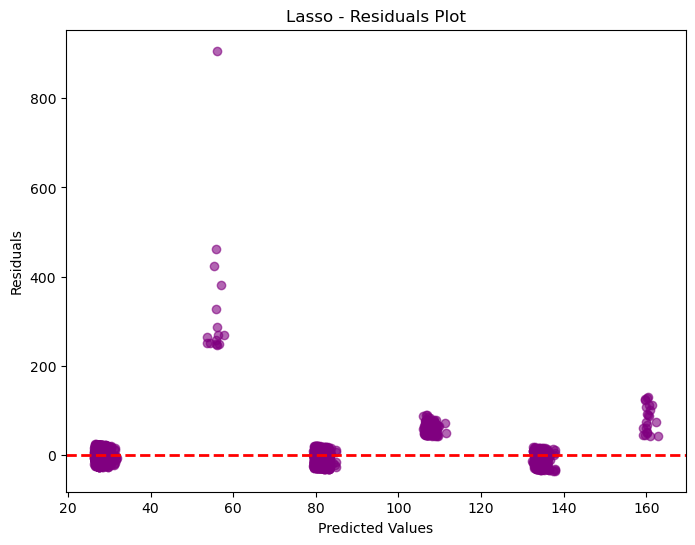

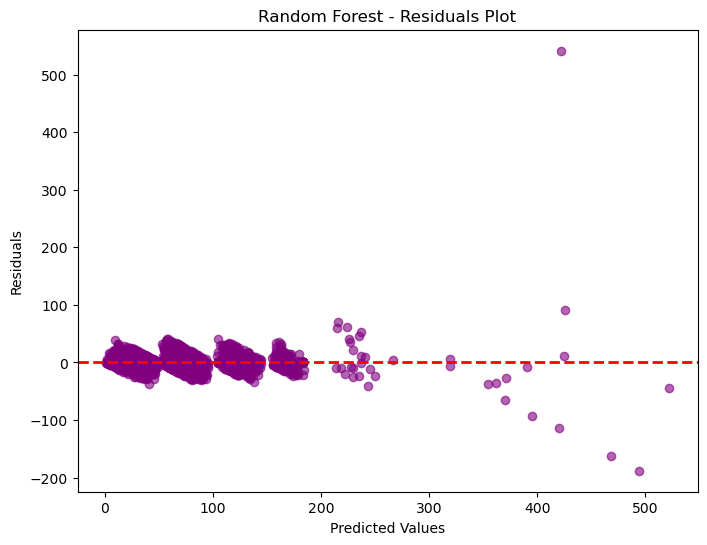

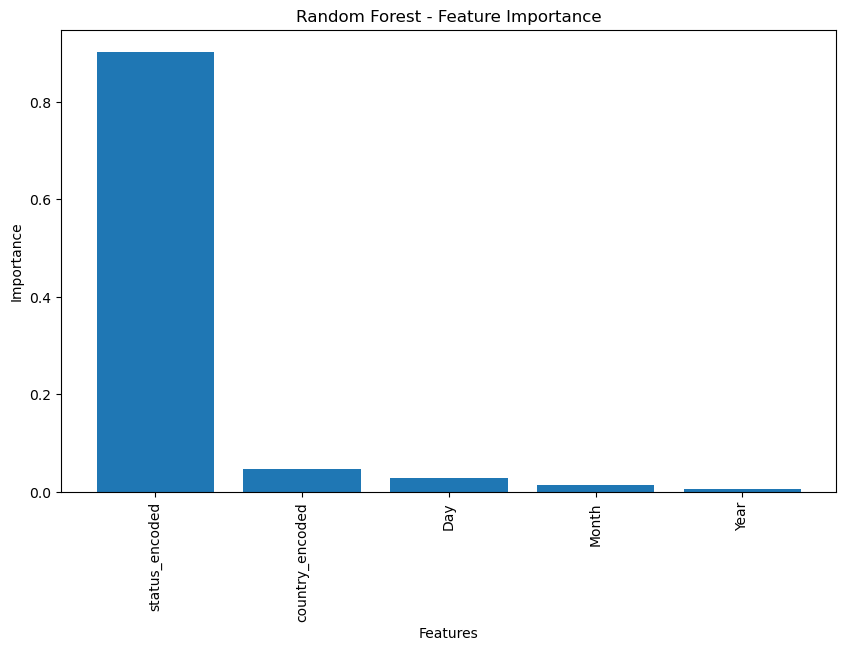

In [42]:
import matplotlib.pyplot as plt
import numpy as np
# Generate predictions for each model
y_pred_ridge = ridge_model.predict(X_test)  # Replace 'ridge_model' with your trained Ridge model
y_pred_lasso = lasso_model.predict(X_test)  # Replace 'lasso_model' with your trained Lasso model
y_pred_rf = rf_model.predict(X_test)        # Repla
# Assuming y_test and y_pred_ridge, y_pred_lasso, y_pred_rf are defined
models = {
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso,
    "Random Forest": y_pred_rf
}

# Predicted vs Actual Plot
for model_name, y_pred in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} - Predicted vs Actual Values")
    plt.legend()
    plt.show()

# Residuals Plot
for model_name, y_pred in models.items():
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color="purple", alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} - Residuals Plot")
    plt.show()

# Feature Importance Plot (specific to Random Forest)
if "Random Forest" in models:
    feature_importances = rf_model.feature_importances_  # Assuming rf_model is your trained Random Forest model
    feature_names = X.columns  # Replace with your feature names
    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
    plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Random Forest - Feature Importance")
    plt.show()
